<a href="https://colab.research.google.com/github/abkafi123/Sentiment_Analysis/blob/main/Review_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import re
import numpy as np

In [ ]:
independent = 'BanglaTranslation'
dependent = 'Sentiment'

In [ ]:
from sklearn.preprocessing import LabelEncoder
# data_raw = pd.read_excel('/content/drive/MyDrive/TextClassification/Review Dataset/ProperTags.xlsx')

data_raw = pd.read_excel('/content/drive/MyDrive/TextClassification/Review Dataset/FacebookTags.xlsx')

data = data_raw[[independent,dependent]]
print(data.Sentiment.value_counts())
data = data.dropna()
if type(data.Sentiment[1]) == 'str' or 'obj':
    data.Sentiment = LabelEncoder().fit_transform(data.Sentiment)
data.Sentiment = data.Sentiment.astype(np.int16)

positive    1433
negative     521
Name: Sentiment, dtype: int64


In [ ]:
data = data[[independent,dependent]]
data = data.dropna()
data[independent] = data[independent].apply(str)

In [ ]:
data.drop(data[data['Sentiment']==2].index,inplace=True)

In [ ]:
j=data[dependent].value_counts()
print(j)



1    1430
0     520
Name: Sentiment, dtype: int64


In [ ]:
banglacomments = data.BanglaTranslation
length = []

for i in banglacomments:
    length.append(len(i.split()))
print(length[:3])
print(max(length))

[5, 33, 5]
537


In [ ]:
import numpy as np

avg = 500
print(avg)

# data= data.groupby('Sentiment').filter(lambda x : len(x)>=avg)

data = data.groupby('Sentiment', as_index=False).apply(lambda array: array.loc[np.random.choice(array.index, avg, True),:]) #here true must be false

# data = data.groupby('Sentiment').apply(lambda x: x[:avg])

500


In [ ]:
j=data['Sentiment'].value_counts()
print(j)

0    500
1    500
Name: Sentiment, dtype: int64


In [ ]:
classnumber = len(data.Sentiment.unique())

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
lb=LabelEncoder()
data[['Sentiment']]=data[['Sentiment']].apply(lb.fit_transform)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:ylabel='Frequency'>

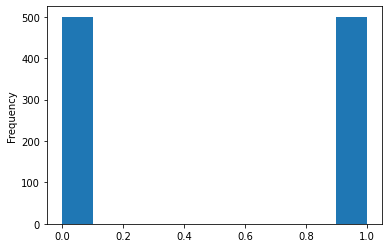

In [ ]:
data['Sentiment'].plot(kind='hist')

In [ ]:
data.head(2)

BanglaTranslation  Sentiment
0 823                    জুলাই মাসের টি টেনের খবর নেই।\n          0
  837  দারাজের দালাল গুলি হাহাহা রিএক্ট দিবেই এটাই স্...          0

**trying** to impliment **bert** 

In [ ]:
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import LSTM,Dense,Embedding,SpatialDropout1D,Dropout,Bidirectional,GRU
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split

In [ ]:
max_fatures = 3000
tokenizer = Tokenizer(num_words=max_fatures)
tokenizer.fit_on_texts(data[independent].replace('।',' ').values)
X = tokenizer.texts_to_sequences(data[independent].values)
X = pad_sequences(X,maxlen=100)


In [ ]:
print((X[4]))

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   6 163 926 927]


In [ ]:
X

array([[  0,   0,   0, ..., 561, 115, 105],
       [  0,   0,   0, ..., 565, 421, 422],
       [  0,   0,   0, ...,  38, 242, 924],
       ...,
       [  0,   0,   0, ...,   3, 128,   9],
       [  0,   0,   0, ...,   9,  22, 331],
       [  0,   0,   0, ..., 367,  73, 367]], dtype=int32)

In [ ]:
np.shape(X)

(1000, 100)

In [ ]:
Y = pd.get_dummies(data['Sentiment']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.15,random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(850, 100) (850, 2)
(150, 100) (150, 2)


In [ ]:
import tensorflow as tf


embed_dim = 64
# model = Sequential()
# model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
# model.add(SpatialDropout1D(0.2))
# # model.add(tf.keras.layers.GlobalAveragePooling1D())
# # model.add(Bidirectional(LSTM(4, dropout=0.5, recurrent_dropout=0.5,kernel_regularizer='l2')))
# # model.add(GRU(16, dropout=0.5, recurrent_dropout=0.5,kernel_regularizer='l2',return_sequences=True))
# model.add(LSTM(8, dropout=0.2, recurrent_dropout=0.2,kernel_regularizer='l2'))
# model.add(Dropout(0.2))
# model.add(Dense(classnumber,activation='softmax'))
# model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['acc'])
# model.summary()




from string import punctuation
from os import listdir
from numpy import array
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers import Dropout , GlobalMaxPooling1D
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D


# opt = tf.keras.optimizers.Adam(learning_rate=0.005)
max_fatures = 1000
model = Sequential()
model.add(Embedding(max_fatures, embed_dim, input_length=X.shape[1]))

model.add(Conv1D(16, 3, activation='sigmoid', padding='valid',kernel_regularizer='l2')) #default 48
# model.add(GlobalMaxPooling1D())
# model.add(Conv1D(64, 3, activation='sigmoid', padding='valid',kernel_regularizer='l2')) #default 48
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.2))


model.add(Flatten())
model.add(Dropout(0.1))
model.add(Dense(classnumber, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc']) ##categorical_cross_entropy
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 64)           64000     
                                                                 
 conv1d_2 (Conv1D)           (None, 98, 16)            3088      
                                                                 
 global_max_pooling1d_2 (Glo  (None, 16)               0         
 balMaxPooling1D)                                                
                                                                 
 dropout_4 (Dropout)         (None, 16)                0         
                                                                 
 flatten_2 (Flatten)         (None, 16)                0         
                                                                 
 dropout_5 (Dropout)         (None, 16)                0         
                                                      

In [ ]:
epoch = 50

In [ ]:
history=model.fit(X_train, Y_train, epochs = epoch
                  , batch_size=64, verbose = 1)

Epoch 1/50
14/14 [==============================] - 1s 5ms/step - loss: 1.0517 - acc: 0.4882
Epoch 2/50
14/14 [==============================] - 0s 5ms/step - loss: 0.9663 - acc: 0.4847
Epoch 3/50
14/14 [==============================] - 0s 4ms/step - loss: 0.8905 - acc: 0.5082
Epoch 4/50
14/14 [==============================] - 0s 4ms/step - loss: 0.8434 - acc: 0.5094
Epoch 5/50
14/14 [==============================] - 0s 5ms/step - loss: 0.8105 - acc: 0.4988
Epoch 6/50
14/14 [==============================] - 0s 5ms/step - loss: 0.7802 - acc: 0.4988
Epoch 7/50
14/14 [==============================] - 0s 5ms/step - loss: 0.7620 - acc: 0.5200
Epoch 8/50
14/14 [==============================] - 0s 5ms/step - loss: 0.7470 - acc: 0.5141
Epoch 9/50
14/14 [==============================] - 0s 5ms/step - loss: 0.7310 - acc: 0.5129
Epoch 10/50
14/14 [==============================] - 0s 4ms/step - loss: 0.7304 - acc: 0.5165
Epoch 11/50
14/14 [==============================] - 0s 4ms/step - lo

In [ ]:
# import matplotlib.pyplot as plt

# loss_train = history.history['loss']
# loss_val = history.history['val_loss']
# training_accuracy = history.history['acc']
# validation_accuracy = history.history['val_acc']
# epochs = range(0,epoch)
# plt.plot(epochs, loss_train, 'g', label='Training loss')
# plt.plot(epochs, loss_val, 'b', label='validation loss')

# plt.plot(epochs, training_accuracy, 'r', label='Training accuracy')
# plt.plot(epochs, validation_accuracy, 'y', label='validation accuracy')

# plt.title('Training and Validation loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

In [ ]:
score = model.evaluate(X_test, Y_test,batch_size=64, verbose=2)
print('Train loss:', score[0])
print('Train accuracy:', score[1])
acc = score[1]

3/3 - 0s - loss: 0.3751 - acc: 0.9200 - 127ms/epoch - 42ms/step
Train loss: 0.3751189112663269
Train accuracy: 0.9200000166893005


In [ ]:
import string 
def remove_punc(s):
    pt = str.maketrans({key: None for key in string.punctuation})
    return s.translate(pt)

In [ ]:
x = data[independent].fillna(' ')
y = data[dependent]
print(x.head())
print(y.head())

0  823                       জুলাই মাসের টি টেনের খবর নেই।\n
   837     দারাজের দালাল গুলি হাহাহা রিএক্ট দিবেই এটাই স্...
   1858    একদিন হ্যালো সার, আর আরেকদিন ওয়েট বলে গায়েব। এ...
   81      সোশ্যাল মিডিয়াতে অনলাইনে পন্য কিনে আমি সমস্যা...
   1881                           খুব বাজে কোয়ালিটির গেন্জি!
Name: BanglaTranslation, dtype: object
0  823     0
   837     0
   1858    0
   81      0
   1881    0
Name: Sentiment, dtype: int64


In [ ]:
contractions = { 
"বি.দ্র ": "বিশেষ দ্রষ্টব্য",
"ড.": "ডক্টর",
"ডা.": "ডাক্তার",
"ইঞ্জি:": "ইঞ্জিনিয়ার",
"রেজি:": "রেজিস্ট্রেশন",
"মি.": "মিস্টার",
"মু.": "মুহাম্মদ",
"মো.": "মোহাম্মদ",
}

In [ ]:
import re
import string
from collections import Counter
vocab = Counter()
def clean_text(x,remove_stopwords = False):
    if True:
        new_text = []
        for word in x:
            if word in contractions:
                new_text.append(contractions[word])
            else:
                new_text.append(word)
        x = "".join(new_text)
    # Format words and remove unwanted characters
    whitespace = re.compile(u"[\s\u0020\u00a0\u1680\u180e\u202f\u205f\u3000\u2000-\u200a]+", re.UNICODE)
    bangla_digits = u"[\u09E6\u09E7\u09E8\u09E9\u09EA\u09EB\u09EC\u09ED\u09EE\u09EF]+"
    english_chars = u"[a-zA-Z0-9]"
    punc = u"[(),$%^&*+={}\[\]:\"|\'\~`<>/,€¦!?½£¶™¼©⅐⅑⅒⅓⅔⅕⅖⅗⅘⅙⅚⅛⅜⅝⅞⅟↉¤¿º;-]+"
    bangla_fullstop = u"\u0964"     #bangla fullstop(dari)
    punctSeq   = u"['\"“”‘’]+|[.?!,…]+|[:;]+"
    
    x = re.sub(bangla_digits, " ", x)
    x = re.sub(punc, " ", x)
    x = re.sub(english_chars, " ", x)
    x = re.sub(bangla_fullstop, " ", x)
    x = re.sub(punctSeq, " ", x)
    x = whitespace.sub(" ", x).strip()
    
    x = re.sub(r'https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE)
    x = re.sub(r'\<a href', ' ', x)
    x = re.sub(r'&amp;‘:‘ ’', '', x) 
    x = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]। ,', ' ', x)
    x = re.sub(r'<br />', ' ', x)
    x = re.sub(r'\'', ' ', x)
    x = re.sub(r"[\@$#%~+-\.\'।\"]"," ",x)
    x = re.sub(r"(?m)^\s+", "", x)
    x = re.sub("[()]","",x)
    x = re.sub("[‘’]","",x)
    x = re.sub("[!]","",x)
    x = re.sub("[/]","",x)
    x = re.sub("[:]","",x)
    x = re.sub('\ |\?|\.|\!|\/|\;|\:', ' ',x)
    x = x.strip("/")
    
    if remove_stopwords:
        k = []
        with open('/content/Banglastopword.txt', 'r',encoding="utf-8") as f:
            for word in f:
                word = word.split()
                k.append(word[0])
            x = [t for t in x if t not in k]
            x = "".join(x)
   

    return x

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string
import math
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
%matplotlib inline

In [ ]:
from sklearn.feature_extraction.text import  TfidfVectorizer
vocab = TfidfVectorizer(max_features= 3000, analyzer = clean_text).fit(x) #clean_text

In [ ]:
print(len(vocab.vocabulary_))

64


In [ ]:
print(vocab.get_feature_names()[50])
print(vocab.get_feature_names()[50])

ূ
ূ


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
x = vocab.transform(x)

In [ ]:
print("Shape of the sparse matrix: ", x.shape)
print("Non-Zero occurences: ",x.nnz)
density = (x.nnz/(x.shape[0]*x.shape[1]))*100
print("Density of the matrix = ",density)

Shape of the sparse matrix:  (1000, 64)
Non-Zero occurences:  26193
Density of the matrix =  40.9265625


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15,random_state=101)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
predmnb = mnb.predict(x_test)
print("Confusion Matrix for Multinomial Naive Bayes:")
print(confusion_matrix(y_test,predmnb))
print("Score:",round(accuracy_score(y_test,predmnb)*100,2))
print("Classification Report:",classification_report(y_test,predmnb))

Confusion Matrix for Multinomial Naive Bayes:
[[53 22]
 [21 54]]
Score: 71.33
Classification Report:               precision    recall  f1-score   support

           0       0.72      0.71      0.71        75
           1       0.71      0.72      0.72        75

    accuracy                           0.71       150
   macro avg       0.71      0.71      0.71       150
weighted avg       0.71      0.71      0.71       150



In [ ]:
acc1=metrics.accuracy_score(y_test, predmnb)
print("Accuracy:",acc1*100,"%")

Accuracy: 71.33333333333334 %


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rmfr = RandomForestClassifier()
rmfr.fit(x_train,y_train)
predrmfr = rmfr.predict(x_test)
print("Confusion Matrix for Random Forest Classifier:")
print(confusion_matrix(y_test,predrmfr))
print("Score:",round(accuracy_score(y_test,predrmfr)*100,2))
print("Classification Report:",classification_report(y_test,predrmfr))

Confusion Matrix for Random Forest Classifier:
[[68  7]
 [10 65]]
Score: 88.67
Classification Report:               precision    recall  f1-score   support

           0       0.87      0.91      0.89        75
           1       0.90      0.87      0.88        75

    accuracy                           0.89       150
   macro avg       0.89      0.89      0.89       150
weighted avg       0.89      0.89      0.89       150



In [ ]:
acc2=metrics.accuracy_score(y_test,predrmfr)
print("Accuracy:",acc2*100,"%")

Accuracy: 88.66666666666667 %


In [ ]:
from sklearn.svm import LinearSVC
svm = LinearSVC(loss='hinge')
svm.fit(x_train,y_train)
predsvm = svm.predict(x_test)
print("Confusion Matrix for Support Vector Machines:")
print(confusion_matrix(y_test,predsvm))
print("Score:",round(accuracy_score(y_test,predsvm)*100,2))
print("Classification Report:",classification_report(y_test,predsvm))

Confusion Matrix for Support Vector Machines:
[[56 19]
 [18 57]]
Score: 75.33
Classification Report:               precision    recall  f1-score   support

           0       0.76      0.75      0.75        75
           1       0.75      0.76      0.75        75

    accuracy                           0.75       150
   macro avg       0.75      0.75      0.75       150
weighted avg       0.75      0.75      0.75       150



In [ ]:
acc3=metrics.accuracy_score(y_test,predsvm)
print("Accuracy:",acc3*100,"%")

Accuracy: 75.33333333333333 %


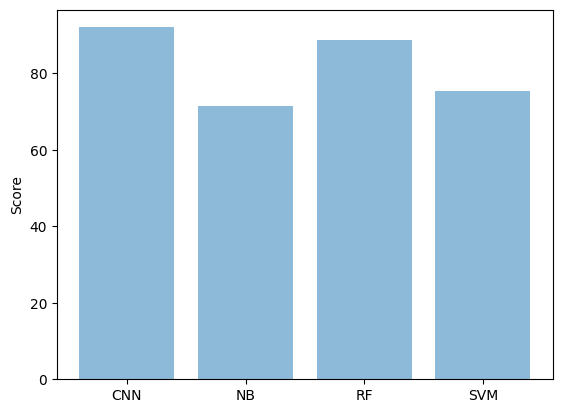

[92.0, 71.33, 88.67, 75.33]


In [ ]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('CNN','NB','RF','SVM')
y_pos = np.arange(len(objects))
performance = [round(acc*100,2),round(acc1*100,2),round(acc2*100,2),round(acc3*100,2)]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Score')

plt.show()
print(performance)

In [ ]:
print(performance)

[92.0, 71.33, 88.67, 75.33]


In [ ]:
!pip install matplotlib==3.5.0

In [ ]:
#improper / human biased
english_improper= [71.11, 72.89, 86.22, 80.0]
bangla_improper = [63.56, 51.11, 82.22, 62.67]

#proper
english_proper = [90.0, 91.33, 99.33, 98.67]
bangla_proper = [89.33, 73.33, 95.33, 81.33]

#facebook and proper experiment with 2 classes
banglaproper = [95.33, 68.0, 91.33, 70.67] #online shop data maxlen = 102
facebookdata = [96.0, 75.67, 95.33, 82.67] #facebook data maxlen = 512
        


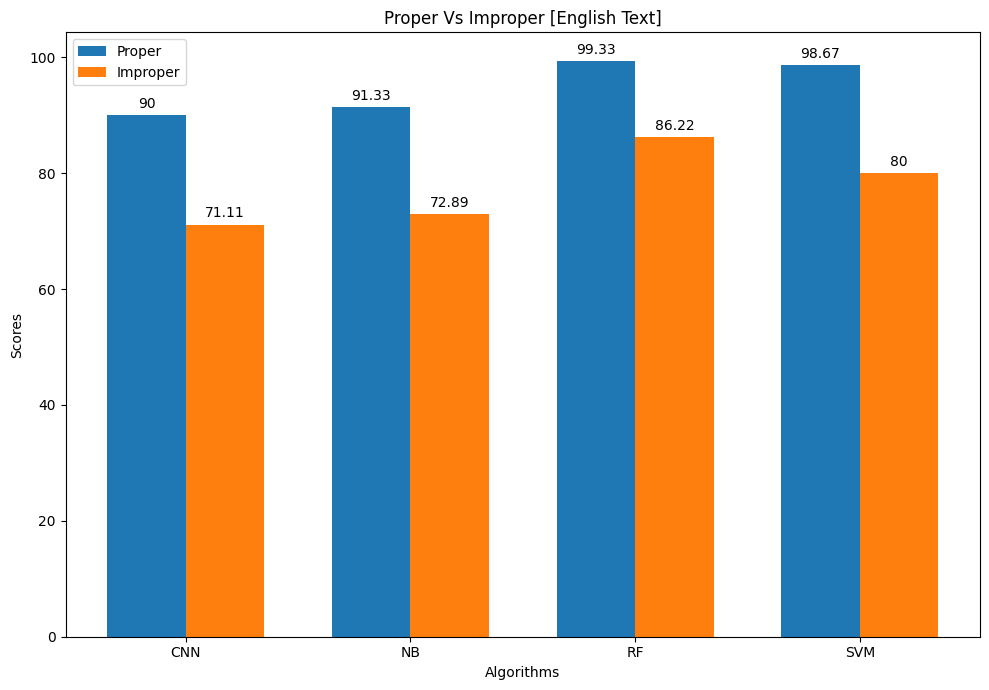

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['CNN','NB','RF','SVM']
english_proper= english_proper
english_improper = english_improper

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(7)
rects1 = ax.bar(x - width/2, english_proper, width, label='Proper')
rects2 = ax.bar(x + width/2, english_improper, width, label='Improper')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_xlabel('Algorithms')
ax.set_title('Proper Vs Improper [English Text]')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['CNN','NB','RF','SVM']
bangla_proper= bangla_proper
bangla_improper = bangla_improper

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(7)
rects1 = ax.bar(x - width/2, bangla_proper, width, label='Proper')
rects2 = ax.bar(x + width/2, bangla_improper, width, label='Improper')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_xlabel('Algorithms')
ax.set_title('Proper Vs Improper [Bangla Text]')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()


In [ ]:
values = [round(x2-x1,2) for x1,x2 in zip(bangla_improper,bangla_proper) ]
print(values)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['CNN','NB','RF','SVM']
english_proper= english_proper
english_improper = english_improper

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(7)
rects1 = ax.bar(x , values, width, align='center')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Difference')
ax.set_xlabel('Algorithms')
ax.set_title('Proper Vs Improper [English Text]')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)


fig.tight_layout()

plt.show()